In [116]:
cd /content

/content


In [117]:
!ls

google-colab-cs231n  sample_data


In [118]:
!git clone https://github.com/nholmber/google-colab-cs231n.git

fatal: destination path 'google-colab-cs231n' already exists and is not an empty directory.


In [119]:
%cd google-colab-cs231n/assignment1

/content/google-colab-cs231n/assignment1


In [120]:
!pip install imageio

In [121]:
%cd cs231n/datasets/
!ls

/content/google-colab-cs231n/assignment1/cs231n/datasets
cifar-10-batches-py  get_datasets.sh


In [122]:
!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [123]:
!./get_datasets.sh

--2022-03-12 15:04:15--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  44.8MB/s    in 4.4s    

2022-03-12 15:04:20 (37.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [124]:
%cd ../..
!ls

/content/google-colab-cs231n/assignment1
collectSubmission.sh  README.md		    svm.ipynb
cs231n		      requirements.txt	    two_layer_net_colab.ipynb
features.ipynb	      setup_googlecloud.sh  two_layer_net.ipynb
frameworkpython       softmax.ipynb
knn.ipynb	      start_ipython_osx.sh


---
##kNN Model


In [125]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

import inspect
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import Terminal256Formatter

def pretty_print(func):
  source_code = inspect.getsourcelines(func)[0]
  for line in source_code:
    print(highlight(line.strip('\n'), PythonLexer(), Terminal256Formatter()), end='')
  print('')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
# Load CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


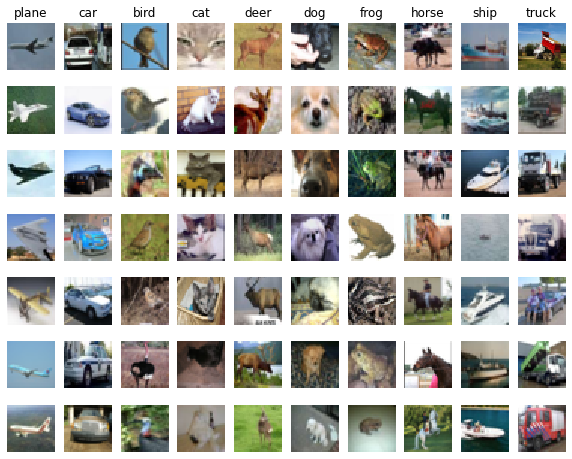

In [127]:

#show few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [142]:
accuracy = []
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()
for k in range(1, 21):
  print("k: ", k)
  acc = []
  for f in range(5):
    # divide data into folds
    validationX, validationY = X_train[f*10000:(f+1)*10000], Y_train[f*10000:(f+1)*10000]
    trainX = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    trainY = np.concatenate((Y_train[:f*10000], Y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0         # c for correct, m for manhattan, e for euclidean

    for i in range(len(validationX)):
      man_distance = []
      euc_distance = []

      for j in range(len(trainX)):
        
        # manhattan - calculating distance between two images
        l1 = np.sum(np.absolute(np.subtract(validationX[i], trainX[j])))

        # euclidean - calculation distance between two images
        l2 = np.sqrt(np.sum((validationX[i] - trainX[j])**2))

        man_distance.append([l1, trainY[j][0]])
        euc_distance.append([l2, trainY[j][0]])
        
        if j == 400:
            break

      man_distance = np.array(man_distance)
      man_distance = man_distance[man_distance[:, 0].argsort()]
      euc_distance = np.array(euc_distance)
      euc_distance = euc_distance[euc_distance[:, 0].argsort()]
      
      # for manhattan distance
      values = man_distance[:k, 1]

      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

      # print(most_frequent_value)
      if most_frequent_value == validationY[i]:
        cm += 1
        
      # for euclidean distance
      values = euc_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validationY[i]:
        ce += 1

      # print(man_distance[0][0], man_distance[-1][0])
      # print(euc_distance[0], euc_distance[-1])

      if i == 120:
        break

    acc.append([cm/100, ce/100])
  accuracy.append([acc, k])

print(accuracy)

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.18, 0.18], [0.29, 0.21], [0.17, 0.12], [0.24, 0.21], [0.13, 0.14]], 1], [[[0.17, 0.11], [0.21, 0.24], [0.19, 0.15], [0.24, 0.22], [0.16, 0.14]], 2], [[[0.27, 0.12], [0.27, 0.18], [0.18, 0.18], [0.25, 0.18], [0.14, 0.15]], 3], [[[0.2, 0.17], [0.29, 0.29], [0.19, 0.17], [0.2, 0.25], [0.16, 0.18]], 4], [[[0.13, 0.17], [0.25, 0.24], [0.2, 0.18], [0.24, 0.23], [0.12, 0.19]], 5], [[[0.14, 0.16], [0.24, 0.2], [0.21, 0.18], [0.25, 0.2], [0.16, 0.17]], 6], [[[0.16, 0.17], [0.27, 0.22], [0.18, 0.17], [0.25, 0.19], [0.21, 0.2]], 7], [[[0.2, 0.2], [0.28, 0.2], [0.24, 0.18], [0.22, 0.21], [0.2, 0.23]], 8], [[[0.15, 0.16], [0.28, 0.21], [0.22, 0.19], [0.23, 0.21], [0.22, 0.22]], 9], [[[0.17, 0.15], [0.27, 0.24], [0.22, 0.2], [0.27, 0.24], [0.25, 0.22]], 10], [[[0.19, 0.13], [0.26, 0.19], [0.23, 0.22], [0.23, 0.28], [0.25, 0.23]], 11], [[[0.17, 0.14], [0.24, 0.2], [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


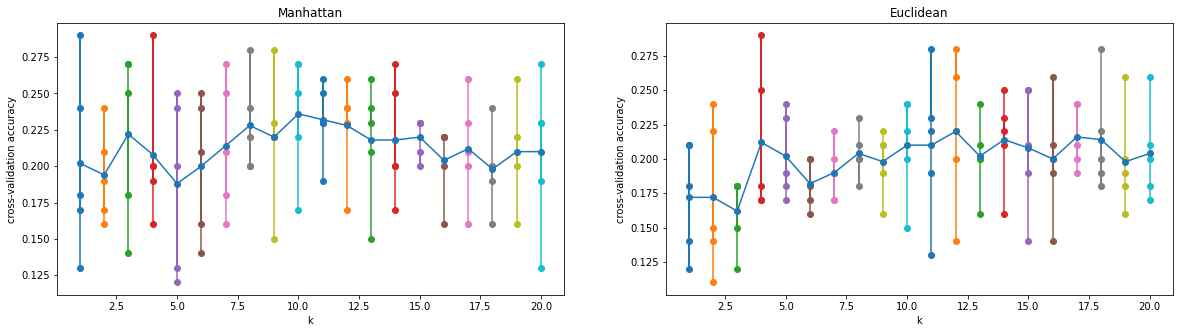

In [143]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Manhattan')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  avg1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2)
plt.title('Euclidean')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()

In [128]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [129]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [130]:
from cs231n.classifiers import KNearestNeighbor
 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)


In [ ]:

# Print out implementation
pretty_print(classifier.compute_distances_two_loops)

# Test implementation:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)



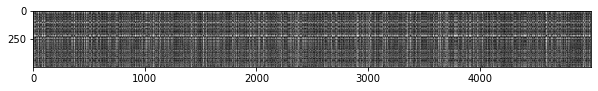

In [132]:
#visualize the distance matrix
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

In [133]:
#implement of the function predict_labels 
#use k = 1 
y_test_pred = classifier.predict_labels(dists, k=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [134]:
y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


In [ ]:
# Print out implementation
pretty_print(classifier.compute_distances_one_loop)

#run calculation
dists_one = classifier.compute_distances_one_loop(X_test)

difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Distance matrices are the same')
else:
    print('Distance matrices are different')

In [ ]:
# Print out implementation
pretty_print(classifier.compute_distances_no_loops)

# Now run calculation
dists_two = classifier.compute_distances_no_loops(X_test)

# check if the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Distance matrices are the same')
else:
    print('Distance matrices are different')

In [137]:
# Let's compare how fast the implementations are
def time_function(f, *args):
 
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)


Two loop version took 25.444741 seconds
One loop version took 37.879236 seconds
No loop version took 0.588329 seconds


### Cross-validation



In [138]:
num_folds = 5
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Check that training set can be equally divided into num_folds portions
if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')

# Split training set into num_folds lists
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []
    
for idx in range(num_folds):
     
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]
    # Train kNN classifier
    classifier = KNearestNeighbor()
    classifier.train(X_train_set, y_train_set)
    # Compute distances
    dists_validate = classifier.compute_distances_no_loops(X_validation_set)
    for k in k_choices:
        # Predict labels for validation set
        y_validation_pred = classifier.predict_labels(dists_validate, k=k)
        # Check accuracy
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 2, accuracy = 0.235000
k = 2, accuracy = 0.219000
k = 2, accuracy = 0.234000
k = 2, accuracy = 0.247000
k = 2, accuracy = 0.252000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 4, accuracy = 0.259000
k = 4, accuracy = 0.270000
k = 4, accuracy = 0.269000
k = 4, accuracy = 0.294000
k = 4, accuracy = 0.272000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 6, accuracy = 0.253000
k = 6, accuracy = 0.277000
k = 6, accuracy = 0.274000
k = 6, accuracy = 0.273000
k = 6, accuracy = 0.282000
k = 7, accuracy = 0.261000
k = 7, accuracy = 0.279000
k = 7, accuracy = 0.268000
k = 7, accuracy = 0.288000
k = 7, accuracy = 0.276000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k

k = 1, average accuracy = 0.265600
k = 2, average accuracy = 0.237400
k = 3, average accuracy = 0.249600
k = 4, average accuracy = 0.272800
k = 5, average accuracy = 0.273200
k = 6, average accuracy = 0.271800
k = 7, average accuracy = 0.274400
k = 8, average accuracy = 0.276000
k = 9, average accuracy = 0.276400
k = 10, average accuracy = 0.280200
k = 11, average accuracy = 0.277400
k = 12, average accuracy = 0.279400
k = 13, average accuracy = 0.274600
k = 14, average accuracy = 0.282000
k = 15, average accuracy = 0.275000
k = 16, average accuracy = 0.275600
k = 17, average accuracy = 0.275200
k = 18, average accuracy = 0.277600
k = 19, average accuracy = 0.277800
k = 20, average accuracy = 0.279000


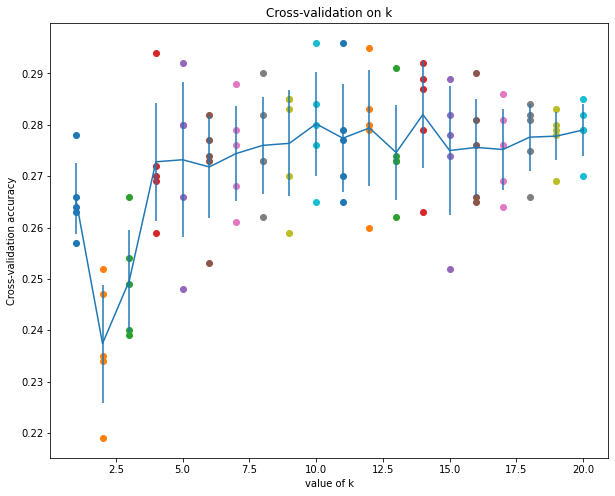

In [139]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('value of k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [140]:
# based on the cross-validation results, choose the best value for k  
# 28% accuracy on the test data when k=10
best_k = 10

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 141 / 500 correct => accuracy: 0.282000


# Discussion 

### KNN: 
The full form of KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. This algorithm can be used to solve both classification and regression problem statements.
The number of nearest neighbors to a new unknown variable that has to be predicted or classified is denoted by the symbol ‘K’.

The KNN algorithm can compete with the most accurate models because it makes highly accurate predictions. Therefore, we can use the KNN algorithm for applications that require high accuracy but that do not require a human-readable model. The quality of the predictions depends on the distance measure. Therefore, the KNN algorithm is suitable for applications for which sufficient domain knowledge is available. This knowledge supports the selection of an appropriate measure.

### Application: 
Forecasting stock market: Predict the price of a stock, on the basis of company performance measures and economic data.
Currency exchange rate.
Bank bankruptcies.
Understanding and managing financial risk.
Trading futures.
Credit rating.
Loan management.
Bank customer profiling.
Money laundering analyses.

### KNN algorithm is not good for image classification. KNN does not elaborate on the attributes of a specific class. It just finds a difference on every pixel value but not features. KNN works better on data having columns as attributes in which every attribute defines a specific feature. But in the image case, every pixel value does not define a specific feature. We should use convolutional neural network-CNN for better results.


